In [1]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn import datasets as skds

In [2]:
X,y = skds.make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=20.0)


In [36]:
# Convert X and y to float32
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)  # Ensure y is shaped correctly for one target

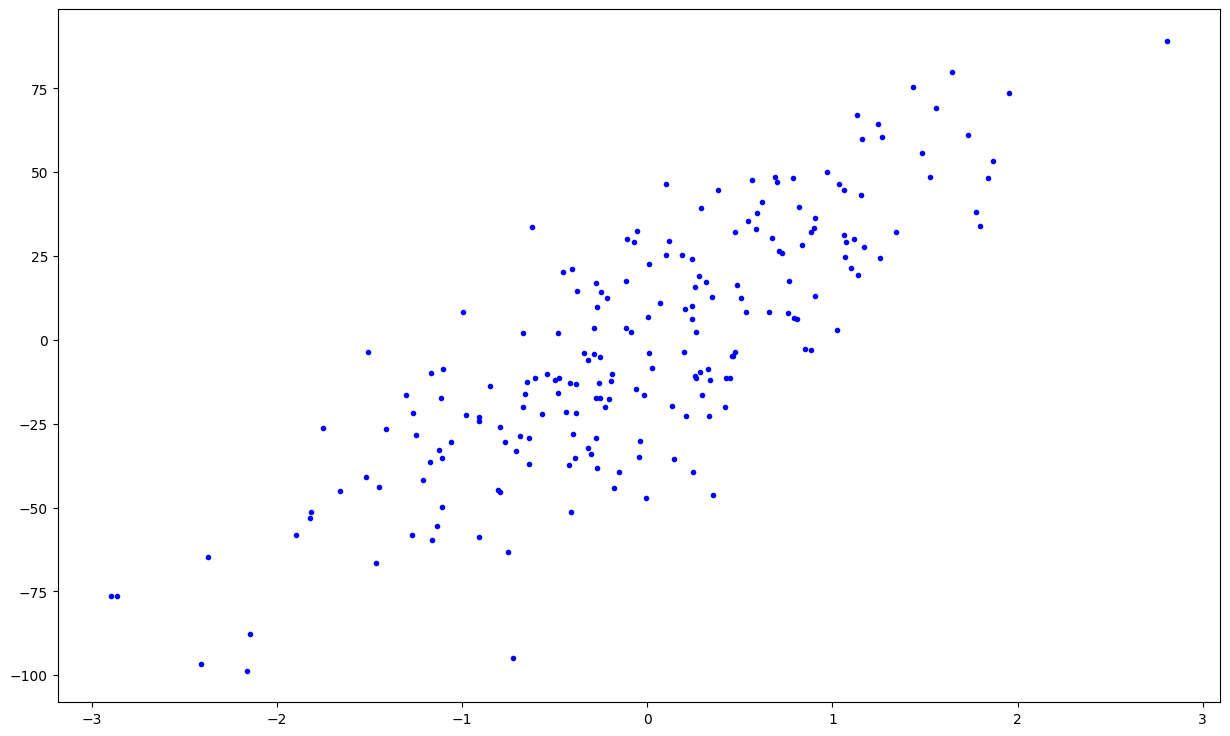

In [37]:
if(y.ndim==1):
    y=y.reshape(len(y),1)

plot.figure(figsize=(15,9))

plot.plot(X,y,'.b')


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)


In [40]:
##Defining inputs, parameters and other variables
num_outputs=y_train.shape[1] #one response variable
num_inputs=X_train.shape[1] #one predictor

In [41]:
##Use placeholders
import tensorflow as tf

##define eqn: y=W*x + b

# Equation y=W*x + b

In [42]:
x_tensor = tf.Variable(tf.zeros([32, num_inputs], dtype=tf.float32), name="x")
y_tensor = tf.Variable(tf.zeros([32, num_outputs], dtype=tf.float32), name="y")

w=tf.Variable(tf.zeros([num_inputs,num_outputs]),dtype=tf.float32,name="w")
b=tf.Variable(tf.zeros([num_outputs]),dtype=tf.float32,name="b")

model=tf.matmul(x_tensor,w)+b #y=W*x + b


# Defining the Loss Funciton
# Residual  is (y)predict - (y)actual
in current case residual = model-y_tensor

In [43]:
loss = tf.reduce_mean(tf.square(model-y_tensor))#MSE


#Compute MSE & R2

In [44]:
mse = tf.reduce_mean(tf.square(model-y_tensor))#MSE
y_mean=tf.reduce_mean(y_tensor)
total_error=tf.reduce_sum(tf.square(y_tensor-y_mean))
unexplained_error=tf.reduce_sum(tf.square(y_tensor-model))
rsq = 1 - (unexplained_error / total_error)
print (rsq)

tf.Tensor(nan, shape=(), dtype=float32)


# Define optimizer funciton

In [45]:
learning_rate=0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

##gradient descent is an algorithm that minimizes functions
## learning rate is the step we take per iteration

# Train the model


In [46]:
num_epochs=1800 ##number of iterations to run the training for
##w_hat and b_hat: estimates of w and b
w_hat=0
b_hat=0

loss_epochs=np.empty(shape=[num_epochs],dtype=float)
mse_epochs=np.empty(shape=[num_epochs],dtype=float)
rs_epochs=np.empty(shape=[num_epochs],dtype=float)


In [47]:
# Training loop
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        model = tf.matmul(X_train, w) + b  # y = W*x + b
        loss = tf.reduce_mean(tf.square(model - y_train))  # MSE

    # Compute gradients and apply them
    gradients = tape.gradient(loss, [w, b])
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    optimizer.apply_gradients(zip(gradients, [w, b]))

    # Store loss for this epoch
    loss_epochs[epoch] = loss.numpy()  # Store loss

    # Evaluation on test data
    model_test = tf.matmul(X_test, w) + b
    mse_score = tf.reduce_mean(tf.square(model_test - y_test)).numpy()  # MSE
    y_mean = tf.reduce_mean(y_test)
    total_error = tf.reduce_sum(tf.square(y_test - y_mean))  # Total error
    unexplained_error = tf.reduce_sum(tf.square(y_test - model_test))  # Unexplained error
    rsq_score = 1 - (unexplained_error / total_error).numpy()  # R-squared

    mse_epochs[epoch] = mse_score
    rs_epochs[epoch] = rsq_score

# Final values of w and b
w_hat = w.numpy().reshape(1, -1)  # Final weights
b_hat = b.numpy()  # Final bias

print('Model: Y = {0:.8f} * X + {1:.8f}'.format(w_hat[0][0], b_hat[0]))
print('For test data: MSE = {0:.8f}, R2 = {1:.8f}'.format(mse_score, rsq_score))

Model: Y = 30.70405006 * X + -0.36159900
For test data: MSE = 355.80758667, R2 = 0.66678885


In [48]:
import numpy as np
import matplotlib.pyplot as plt


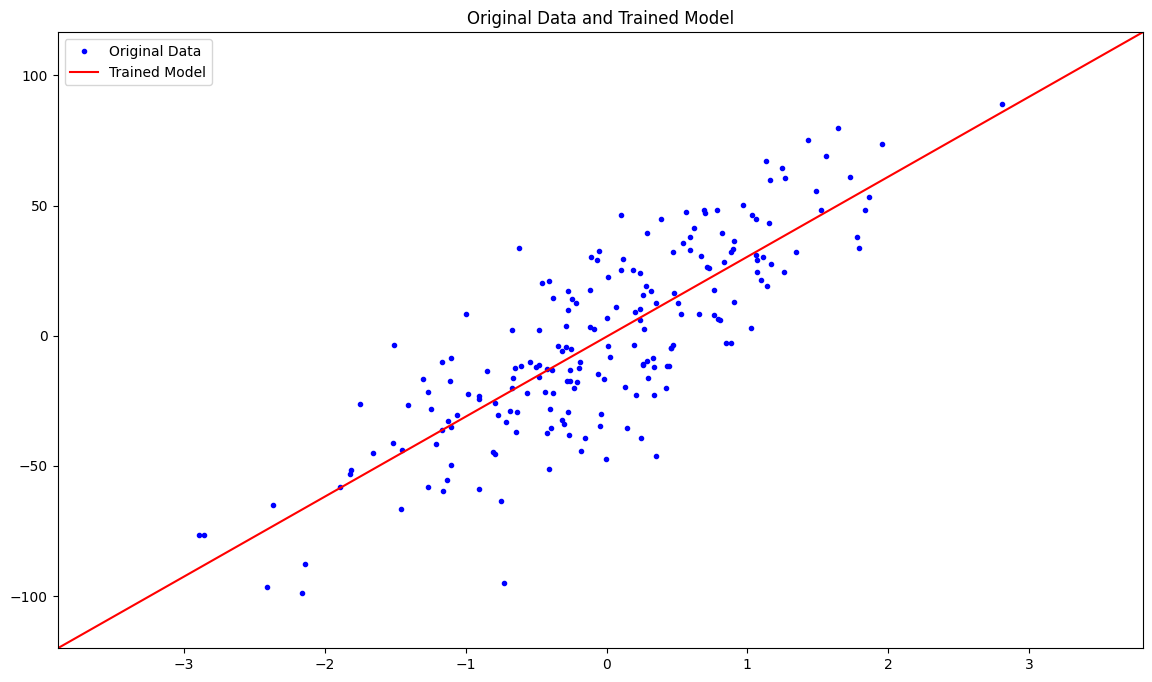

In [53]:
w_hat = w.numpy().flatten()[0]  # Get the first element as a scalar
b_hat = b.numpy()[0]             # Get the first element as a scalar

plt.figure(figsize=(14, 8))
plt.title('Original Data and Trained Model')
x_plot = np.array([np.min(X) - 1, np.max(X) + 1])  # range of X values
y_plot = w_hat * x_plot + b_hat                      # w_hat and b_hat predicted before

# Use min/max of y_plot for the y-axis limits
plt.axis([x_plot[0], x_plot[1], np.min(y_plot), np.max(y_plot)])
plt.plot(X, y, 'b.', label='Original Data')
plt.plot(x_plot, y_plot, 'r-', label='Trained Model')
plt.legend()
plt.show()



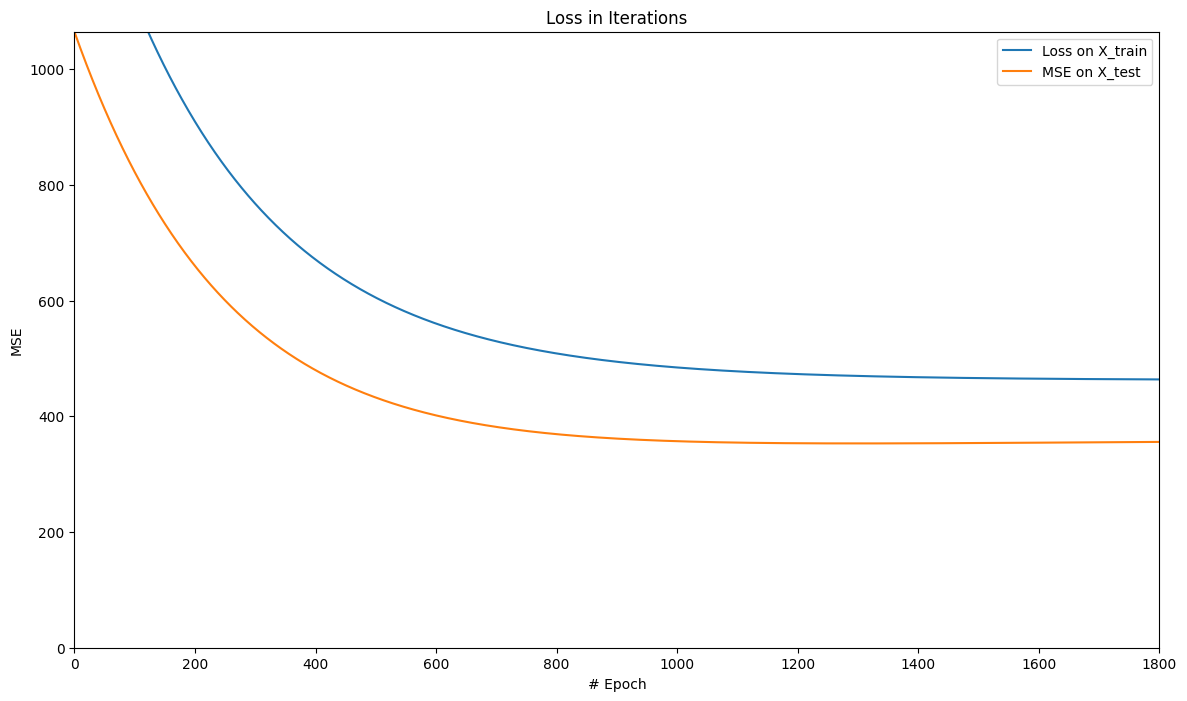

In [54]:
plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()

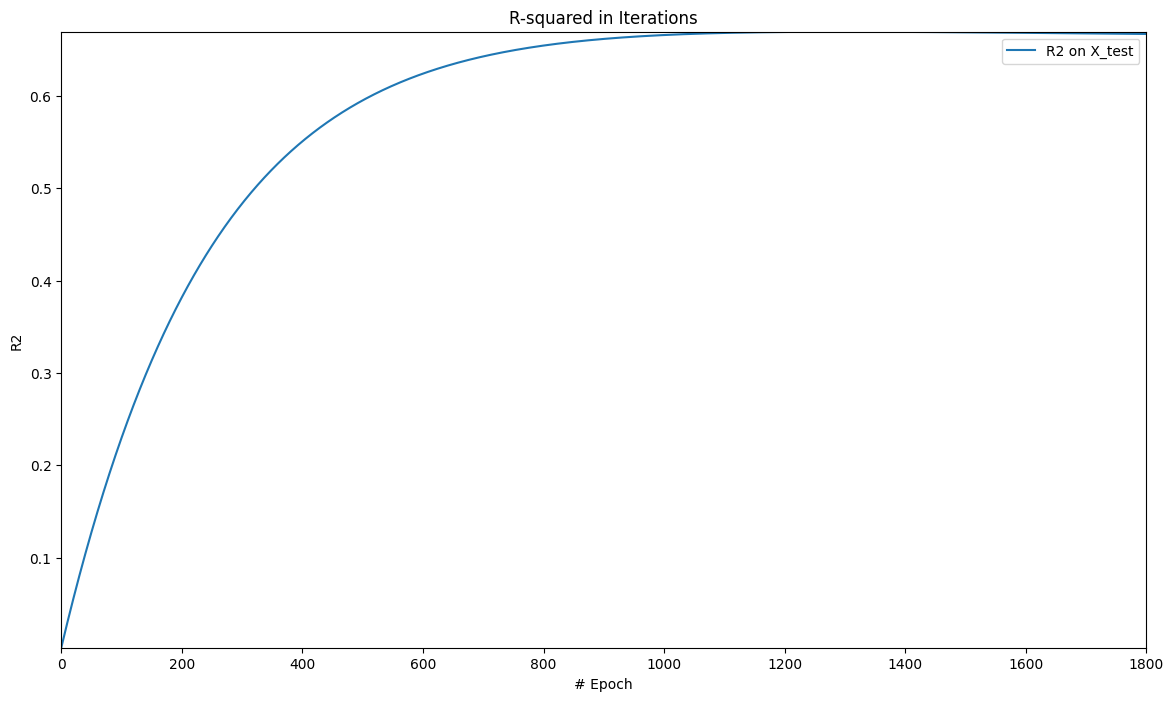

In [55]:
plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()